<a href="https://colab.research.google.com/github/dmaxtop/Heart-Attack-Predictor/blob/main/Heart_Attack_Prediction_With_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing
---







Some Data Preprocessing Techniques:

* Deleting duplicate and null values
* Imputation for missing values
* Handling Categorical Features
* Feature Normalization/Scaling
* Feature Engineering
* Feature Selection

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
heartdata = pd.read_csv('/content/drive/MyDrive/CSE422 Project group 8/heart_attack_prediction_dataset.csv')
heartdata.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


 Removing Null values / Handling Missing data

In [ ]:
heartdata.shape

(8763, 26)

In [ ]:
heartdata.isnull()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8759,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8760,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
heartdata.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [ ]:
heartdata.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
heartdata.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

Standardizing Data

Feature Scaling

In [ ]:
heartdata.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X = heartdata[[
    'Stress Level',
    'Sedentary Hours Per Day',
    'Income',
    'BMI',
    'Triglycerides',
    'Physical Activity Days Per Week',
    'Sleep Hours Per Day'
    ]]

# Selecting the target variable
y = heartdata['Heart Attack Risk']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (7010, 7)
Shape of X_test: (1753, 7)


MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# transform data
X_train_scaled = scaler.transform(X_train)

We can see that after Min-Max Scaling all the values are in the range [0,1]

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 Stress Level                           1.000000
Sedentary Hours Per Day                0.001529
Income                             20062.000000
BMI                                   18.002337
Triglycerides                         30.000000
Physical Activity Days Per Week        0.000000
Sleep Hours Per Day                    4.000000
dtype: float64
per-feature maximum before scaling:
 Stress Level                           10.000000
Sedentary Hours Per Day                11.999313
Income                             299954.000000
BMI                                    39.997211
Triglycerides                         800.000000
Physical Activity Days Per Week         7.000000
Sleep Hours Per Day                    10.000000
dtype: float64


In [ ]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
heartdata.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)


print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Scaled test set accuracy: 0.59


Standard Scaler:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_d = scaler.fit_transform(X_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train)
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.59


Feature Engineering

In [ ]:
heartdata[['Systolic', 'Diastolic']] = heartdata['Blood Pressure'].str.split('/', expand=True)
heartdata['Systolic'] = heartdata['Systolic'].astype(int)
heartdata['Diastolic'] = heartdata['Diastolic'].astype(int)
heartdata.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
heartdata.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


Encoding categorical variables - binary

In [ ]:
heartdata['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

In [ ]:
binary_encoder = LabelBinarizer()
heartdata['Sex_Binary'] = binary_encoder.fit_transform(heartdata['Sex'])

In [ ]:
heartdata['Hemisphere'].unique()

array(['Southern Hemisphere', 'Northern Hemisphere'], dtype=object)

In [ ]:
binary_encoder = LabelBinarizer()
heartdata['Hemisphere_Binary'] = binary_encoder.fit_transform(heartdata['Hemisphere'])

Encoding categorical variables - one-hot encoding

In [ ]:
heartdata['Continent'].unique()

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Australia'], dtype=object)

In [ ]:
Continent_hot = pd.get_dummies(heartdata['Continent'])
Continent_hot .head()

,Africa,Asia,Australia,Europe,North America,South America
0,False,False,False,False,False,True
1,False,False,False,False,True,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,True,False,False,False,False


In [ ]:
heartdata['Continent'].head()

0    South America
1    North America
2           Europe
3    North America
4             Asia
Name: Continent, dtype: object

In [ ]:
heartdata['Diet'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
Diet_hot = pd.get_dummies(heartdata['Diet'])
Diet_hot .head()

,Average,Healthy,Unhealthy
0,True,False,False
1,False,False,True
2,False,True,False
3,True,False,False
4,False,False,True


In [ ]:
heartdata['Diet'].head()

0      Average
1    Unhealthy
2      Healthy
3      Average
4    Unhealthy
Name: Diet, dtype: object

In [ ]:
heartdata.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Sex_Binary,Hemisphere_Binary
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,1,1
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,1,0
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,4,4,France,Europe,Northern Hemisphere,0,174,99,0,0
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,1,0
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,1,0


Feature Selection

In [ ]:
to_drop = ["Patient ID", "Country", "Continent"]
heartdata_subset = heartdata.drop(to_drop, axis=1)
heartdata_subset.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Sex_Binary,Hemisphere_Binary
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Southern Hemisphere,0,158,88,1,1
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Northern Hemisphere,0,165,93,1,0
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,Northern Hemisphere,0,174,99,0,0
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Northern Hemisphere,0,163,100,1,0
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Northern Hemisphere,0,91,88,1,0


Checking for correlated features

In [ ]:
import pandas as pd
numeric_features = heartdata.drop(columns=['Heart Attack Risk']).select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()
abs_correlation_matrix = correlation_matrix.abs()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_correlation_matrix = abs_correlation_matrix.mask(mask)
threshold = 0.7
highly_correlated_pairs = (masked_correlation_matrix > threshold).stack()
correlated_features = highly_correlated_pairs[highly_correlated_pairs].index.tolist()
print("Pairs of highly correlated features:")
for pair in correlated_features:
    print(pair)


Pairs of highly correlated features:


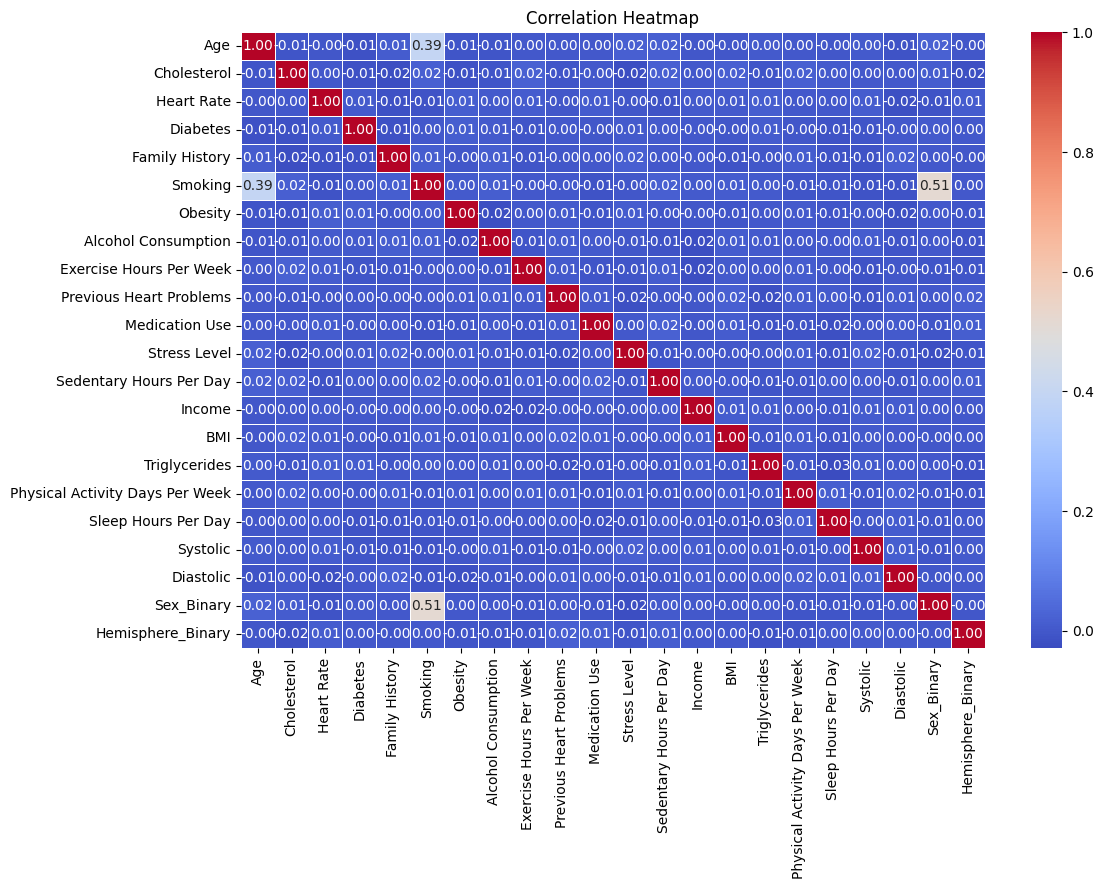

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
heartdata.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic,Sex_Binary,Hemisphere_Binary
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,6,Argentina,South America,Southern Hemisphere,0,158,88,1,1
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,1,7,Canada,North America,Northern Hemisphere,0,165,93,1,0
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,4,4,France,Europe,Northern Hemisphere,0,174,99,0,0
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,3,4,Canada,North America,Northern Hemisphere,0,163,100,1,0
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,1,0


## **Summary:**

Basic Pipeline for solving a ML project:

1. Read in Dataset

2. Get to know your dataset using data vizualisation and other techniques

3. Preprocess your dataset:

  * remove/impute null values
  * remove outliers
  * feature scaling
  * feature engineering
  * feature selection

4. train/test split
5. choose and build (number of) machine learning algorithm
5. train model on training data
6. make prediction on test data
7. evaluate performance on test data
8. visualization of your results



In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


Support Vector Machine: Accuracy = 0.64
K-Nearest Neighbors: Accuracy = 0.57
Decision Tree Classifier: Accuracy = 0.53


In [ ]:
# Define the models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Make predictions on the test data for each model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Display predictions for each model
for name, y_pred in predictions.items():
    print(f"Predictions for {name}:")
    print(y_pred)


Predictions for Support Vector Machine:
[0 0 0 ... 0 0 0]
Predictions for K-Nearest Neighbors:
[0 0 0 ... 1 0 0]
Predictions for Decision Tree Classifier:
[1 1 0 ... 0 1 0]


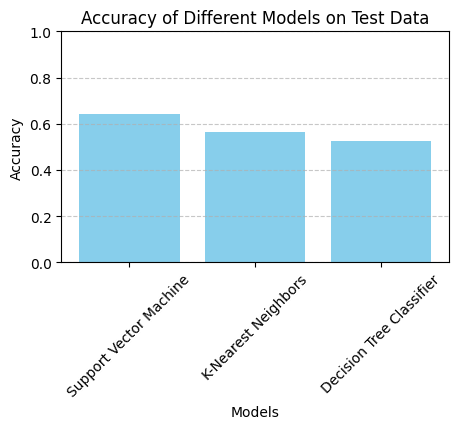

In [ ]:
import matplotlib.pyplot as plt

# Define the models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train each model and make predictions
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Visualize the results
plt.figure(figsize=(5, 3))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on Test Data')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import seaborn as sns

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])

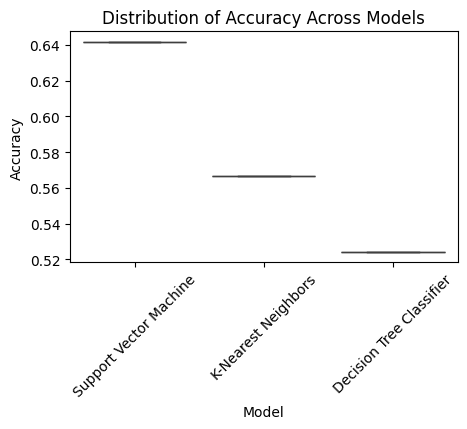

In [ ]:
# Box Plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='Model', y='Accuracy', data=results_df)
plt.title('Distribution of Accuracy Across Models')
plt.xticks(rotation=45)
plt.show()

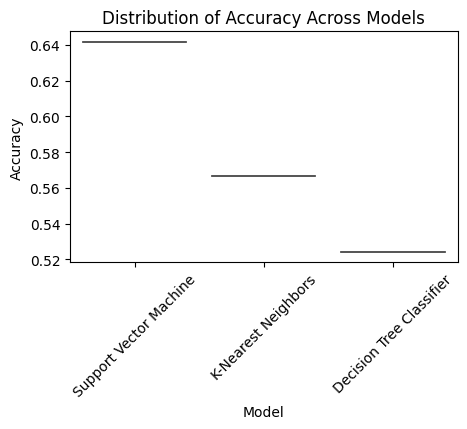

In [ ]:
# Violin Plot
plt.figure(figsize=(5, 3))
sns.violinplot(x='Model', y='Accuracy', data=results_df)
plt.title('Distribution of Accuracy Across Models')
plt.xticks(rotation=45)
plt.show()

<ipython-input-411-53dbedf76fe4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Model', y='Accuracy', data=results_df, ci='sd')


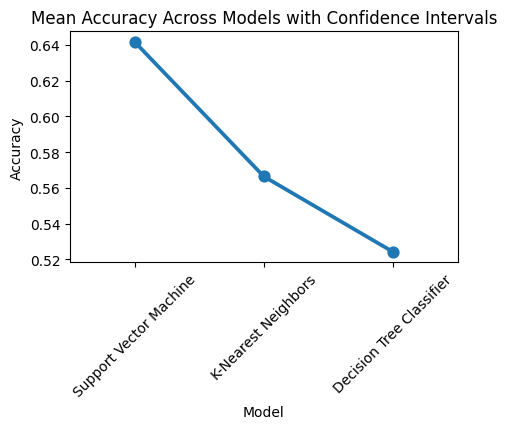

In [ ]:
# Point Plot
plt.figure(figsize=(5, 3))
sns.pointplot(x='Model', y='Accuracy', data=results_df, ci='sd')
plt.title('Mean Accuracy Across Models with Confidence Intervals')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Line Plot (Example: Accuracy vs. Model Complexity)
# For example, if you have a hyperparameter like 'n_neighbors' for KNN
n_neighbors = [1, 3, 5, 7, 9]
accuracies = []

In [ ]:
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


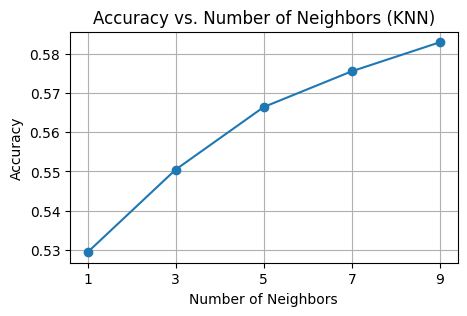

In [ ]:

plt.figure(figsize=(5, 3))
plt.plot(n_neighbors, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (KNN)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Add Naive Bayes to the models dictionary
models['Naive Bayes'] = GaussianNB()

# Make predictions on the test data for each model
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

# Display predictions for each model
for name, y_pred in predictions.items():
    print(f"Predictions for {name}:")
    print(y_pred)


Predictions for Support Vector Machine:
[0 0 0 ... 0 0 0]
Predictions for K-Nearest Neighbors:
[0 0 0 ... 1 0 0]
Predictions for Decision Tree Classifier:
[1 0 0 ... 0 1 0]
Predictions for Naive Bayes:
[0 0 0 ... 0 0 0]


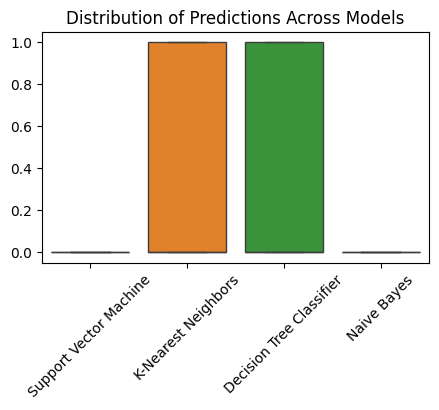

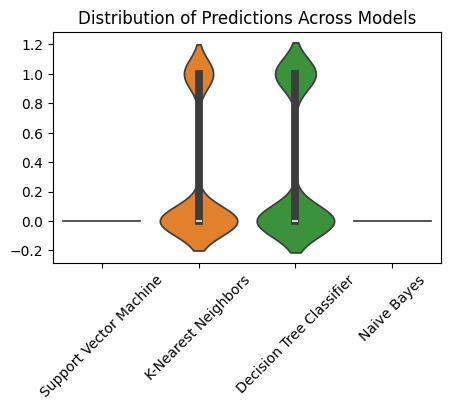

<ipython-input-417-e00e61dff588>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=predictions_df, ci='sd')


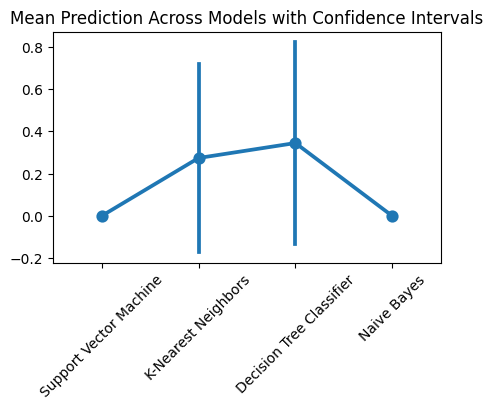

In [ ]:
# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions)

# Box Plot
plt.figure(figsize=(5, 3))
sns.boxplot(data=predictions_df)
plt.title('Distribution of Predictions Across Models')
plt.xticks(rotation=45)
plt.show()

# Violin Plot
plt.figure(figsize=(5, 3))
sns.violinplot(data=predictions_df)
plt.title('Distribution of Predictions Across Models')
plt.xticks(rotation=45)
plt.show()

# Point Plot
plt.figure(figsize=(5, 3))
sns.pointplot(data=predictions_df, ci='sd')
plt.title('Mean Prediction Across Models with Confidence Intervals')
plt.xticks(rotation=45)
plt.show()


<ipython-input-418-7d1af63e3288>:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=pd.DataFrame(predictions), ci='sd')


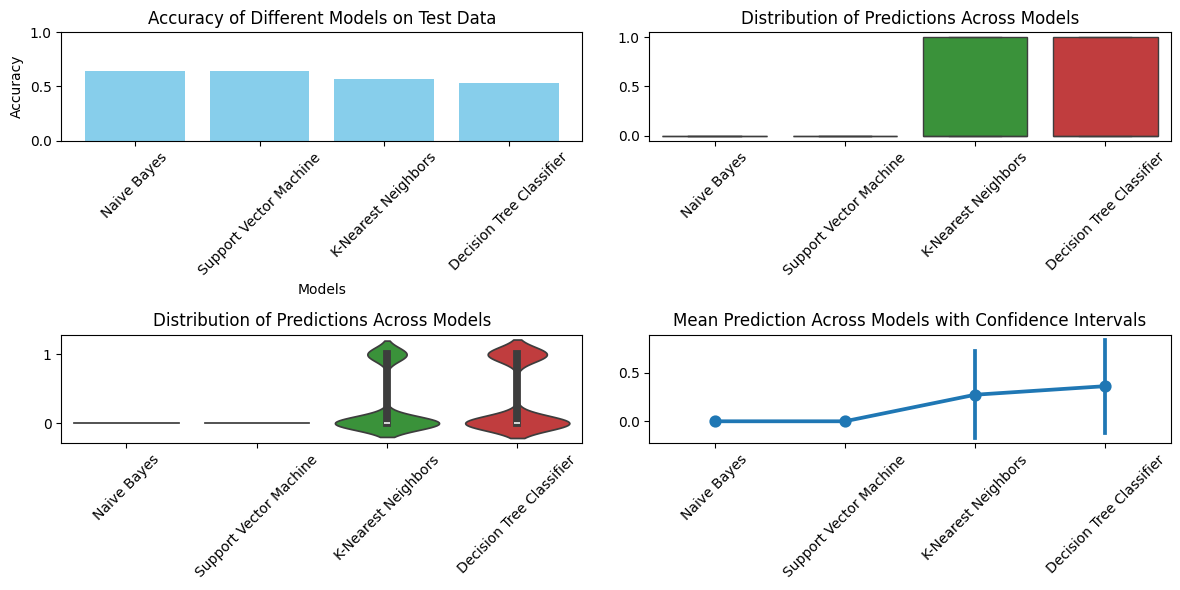

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train each model and make predictions
results = {}
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Visualize results
plt.figure(figsize=(12, 6))

# Bar Plot
plt.subplot(2, 2, 1)
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Accuracy of Different Models on Test Data')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(data=pd.DataFrame(predictions))
plt.title('Distribution of Predictions Across Models')
plt.xticks(rotation=45)

# Violin Plot
plt.subplot(2, 2, 3)
sns.violinplot(data=pd.DataFrame(predictions))
plt.title('Distribution of Predictions Across Models')
plt.xticks(rotation=45)

# Point Plot
plt.subplot(2, 2, 4)
sns.pointplot(data=pd.DataFrame(predictions), ci='sd')
plt.title('Mean Prediction Across Models with Confidence Intervals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
